In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math

In [2]:
def mean(X):
    return sum(X) / float(len(X))

def stdev(X):
    avg = mean(X)
    return math.sqrt(sum([pow(x - avg, 2) for x in X]) / float(len(X)))

def gaussian_probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) /
                          (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [3]:
iris_data = load_iris()

In [4]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X = iris_data['data']
y = iris_data['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test)

(100, 50, 100, 50)

In [8]:
u = mean(X_train[:,0])

In [9]:
np.std(X_train[:,0])

0.8311889075294496

In [10]:
std = stdev(X_train[:,0])

In [11]:
u,std

(5.814999999999999, 0.8311889075294497)

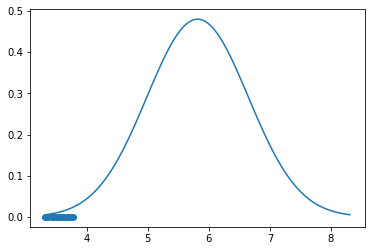

In [14]:
import matplotlib.pyplot as plt
points = np.linspace(u-3*std, u+3*std, 100)
gvs = []
for p in points:
    gvs.append(gaussian_probability(p,u,std))

plt.plot(points, gvs)
plt.scatter(points[:10],[0]*10)


In [16]:
gvalue = []
for fvalue in X_train[:,0]:
    print(gaussian_probability(fvalue, u, std))
    gvalue.append(gaussian_probability(fvalue, u, std))

0.4753939050871128
0.04783609245454676
0.46417469391299604
0.3315342802858865
0.03667793015732523
0.47988768800935744
0.36503234398059764
0.2967832475306197
0.3315342802858865
0.2967832475306197
0.4048343260440879
0.22772085876204923
0.2967832475306197
0.3315342802858865
0.46417469391299604
0.3315342802858865
0.4753939050871128
0.03667793015732523
0.16490037286361897
0.4311437430213643
0.4753939050871128
0.44670741203531006
0.4682234390811656
0.47988768800935744
0.4682234390811656
0.42371974880793417
0.4311437430213643
0.44670741203531006
0.42371974880793417
0.2967832475306197
0.3746678426162503
0.2967832475306197
0.2967832475306197
0.44670741203531006
0.27229319145889175
0.26185699125715034
0.47988768800935744
0.2967832475306197
0.2967832475306197
0.47746270576803906
0.3315342802858865
0.2047385392709172
0.4682234390811656
0.4525647196023136
0.03667793015732523
0.44670741203531006
0.112692718861953
0.09115987889724247
0.4682234390811656
0.11975611334673432
0.16490037286361897
0.331534

In [17]:
n_category = set(y_train)
n_category

{0, 1, 2}

In [18]:
data_by_label = {}
for cate in n_category:
    print(cate)
    data_by_label[cate] = []

0
1
2


In [19]:
data_by_label

{0: [], 1: [], 2: []}

In [20]:
for data,target in zip(X_train,y_train):
    #print(data, target)
    data_by_label[target].append(data)

In [21]:
prior0 = len(data_by_label[0])/len(X_train)
prior0

0.31

In [22]:
prior1 = len(data_by_label[1])/len(X_train)
prior1

0.35

In [23]:
prior2 = len(data_by_label[2])/len(X_train)
prior2

0.34

In [24]:
n_feature = len(X_train[0])
n_feature

4

In [25]:
model = {}

for cate in set(y_train):
    d = np.array(data_by_label[cate])
    #print(d[:,0])
    mu_std = []
    for i in range(n_feature):
        mu = mean(d[:,i])
        std = stdev(d[:,i])
        mu_std.append((mu,std))
    model[cate] = mu_std
        